This is Bryan Allen's submission for IDB10's Final Porfolio for skills of Python-Jupyter-Pandas-GitHub programming. It is based on a popular database of nutrition data from McD's Menu Items in India! There are three Q's I am curious to know and will attempt to answer using data manipulation:
1.) What is the most unhealthy item on the Menu(I.E. Which item(s) contain the most fat?
2.) Which item(s) have the HIGHEST ratio of sugar to serving size?
3.) Which item(s) have the HIGHEST ratio of sodium to serving size?
I hope that some these insights can help our programmer friends on Indian sub-continent make healthy choices for themselves and for their familes, so that they can responsibly enjoy these unique Indian-American treats. Who knows, maybe some of them will choose to work with McDs in the future.

<a class="anchor" id="table_contents"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Table of Contents</span></h2>

* [Section 1: Importing Necessary Libraries and Data](#section1)
* [Section 2: Previewing Data](#section2)
* [Section 3: Data Cleaning](#section3)
* [Section 4: Question #1 Danger of Sugar](#section4)
* [Section 5: Question #2 Danger of Fat](#section5)
* [Section 6: Question #3 Danger of Sodium](#section6)
* [Section 7: Building the Model](#section7)
* [Section 8: Testing Custom Data](#section8)

<a class="anchor" id="section1"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Importing Necessary Libraries and Data</span></h2>

In [134]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt

NOTE: My project contains modules and libraries that are named according to MY naming convetions, since I am owner of this Notebook. I'm aware that on teams the standard naming convention is to create abbreviated aliases, and so when I'm on those teams I'll defer to their conventions, but if the project is mine I will name the modules whatever looks the coolest.

Some programmers have asked why I do this; aliases make everything kinda look the same to me to force me to strain looking at them, the same when I look at red on green background, so maybe it's a disconnect between the brain and the eye (indeed I do have a touch of that color blindness). But the simple answer is that python code is fun to type, and it's beautiful to look at, for me anyway.
<br /><br />
Bryan Allen, apprentice Data Engineer<br />
Lusaka Zambia August 2022


In [135]:
dataframe = pandas.read_csv('India_Menu.csv')

<a class="anchor" id="section2"></a>
<h2 style="color: #808080; background-color:#808080; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Previewing Data</span></h2>

Taking a look at the head and tail of our DB can quickly give us an idea how long and how wide is the DB we're working with. Also we'll get rough idea how much cleaning our data will require

In [136]:
print(dataframe.head(2))
print(dataframe.tail(2))

  Menu Category            Menu Items Per Serve Size  Energy (kCal)  \
0  Regular Menu      McVeggie™ Burger          168 g         402.05   
1  Regular Menu  McAloo Tikki Burger®          146 g         339.52   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   

   Total carbohydrate (g)  Total Sugars (g)  Added Sugars (g)  Sodium (mg)  
0                   56.54              7.90              4.49       706.13  
1                   50.27              7.05              4.07       545.34  
       Menu Category            Menu Items Per Serve Size  Energy (kCal)  \
139  Condiments Menu            Sweet Corn           40 g          45.08   
140  Condiments Menu  Mixed Fruit Beverage         180 ml          72.25   

     Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  \
139         1.47      

In [137]:
item_count = dataframe['Menu Items'].count()
print("There are", item_count, "items in the dataframe")
print()
print("While we're at it let's go ahead take look at our column headers as a list")
list(dataframe.columns)

There are 141 items in the dataframe

While we're at it let's go ahead take look at our column headers as a list


['Menu Category',
 'Menu Items',
 'Per Serve Size',
 'Energy (kCal)',
 'Protein (g)',
 'Total fat (g)',
 'Sat Fat (g)',
 'Trans fat (g)',
 'Cholesterols (mg)',
 'Total carbohydrate (g)',
 'Total Sugars (g)',
 'Added Sugars (g)',
 'Sodium (mg)']

In [138]:
num_unique_cats = dataframe["Menu Category"].nunique()
print("There are", num_unique_cats,"unique categories of menu items. Let's take look at them:")
print(dataframe["Menu Category"].value_counts())
print()
print("Hey, this looks like good opportunity create a Histogram!")
print("Let's visualize the dispersion of these categories")
print()
menu_cat_values = (dataframe["Menu Category"].value_counts())
## dataframe.plot.hist(menu_cat_values.astype(int))
## dataframe.plot.hist(num_unique_cats)
## print(menu_cat_values)

There are 7 unique categories of menu items. Let's take look at them:
McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu Category, dtype: int64

Hey, this looks like good opportunity create a Histogram!
Let's visualize the dispersion of these categories



<a class="anchor" id="section3"></a>
<h2 style="color:#808080; background-color:#808080; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Data Cleaning</span></h2>

In [139]:
for col in list(dataframe.columns):
    ## print(dataframe[col].str.replace(u"\u2122",''))
    dataframe[col] = dataframe[col].astype(str).str.replace(u"\u2122",'')

In [140]:
for col in list(dataframe.columns):
    ## print(dataframe[col].str.replace(u"\u2122",''))
    dataframe[col] = dataframe[col].astype(str).str.replace("®",'')

In [141]:
for i in range(len(dataframe['Per Serve Size'])):
    curr_cell = dataframe['Per Serve Size'][i]
    curr_cell = curr_cell.split(' ')
    dataframe['Per Serve Size'][i] = curr_cell[0]
    i += 1

In [142]:
print("Total Sugars starts as type:", dataframe['Total Sugars (g)'].dtype)
print("Serve Size starts as type:", dataframe['Per Serve Size'].dtype)
print("Total fat starts as type:", dataframe['Total fat (g)'].dtype)
print("Total Sodium starts as type:", dataframe['Sodium (mg)'].dtype)
print("- " * 10,"Busy converting","- " * 10)
dataframe['Per Serve Size'] = dataframe['Per Serve Size'].astype(float)
dataframe['Total Sugars (g)'] = dataframe['Total Sugars (g)'].astype(float)
dataframe['Total fat (g)'] = dataframe['Total fat (g)'].astype(float)
dataframe['Sodium (mg)'] = dataframe['Sodium (mg)'].astype(float)
print("Column Total Sugars has been converted to type:",dataframe['Total Sugars (g)'].dtype)
print("Column Serve Size has been converted to type:",dataframe['Per Serve Size'].dtype)
print("Column Total fat has been converted to type:",dataframe['Total fat (g)'].dtype)
print("Column Total Sodium has been converted to type:",dataframe['Sodium (mg)'].dtype)

Total Sugars starts as type: object
Serve Size starts as type: object
Total fat starts as type: object
Total Sodium starts as type: object
- - - - - - - - - -  Busy converting - - - - - - - - - - 
Column Total Sugars has been converted to type: float64
Column Serve Size has been converted to type: float64
Column Total fat has been converted to type: float64
Column Total Sodium has been converted to type: float64


In [143]:
print(dataframe.head(10))

  Menu Category              Menu Items  Per Serve Size Energy (kCal)  \
0  Regular Menu         McVeggie Burger           168.0        402.05   
1  Regular Menu     McAloo Tikki Burger           146.0        339.52   
2  Regular Menu   McSpicy Paneer Burger           199.0        652.76   
3  Regular Menu       Spicy Paneer Wrap           250.0        674.68   
4  Regular Menu     American Veg Burger           177.0        512.17   
5  Regular Menu        Veg Maharaja Mac           306.0        832.67   
6  Regular Menu  Green Chilli Aloo Naan           132.0        356.09   
7  Regular Menu              Pizza Puff            87.0        228.21   
8  Regular Menu       Mc chicken Burger           173.0         400.8   
9  Regular Menu    FILLET-O-FISH Burger           136.0        348.11   

  Protein (g)  Total fat (g) Sat Fat (g) Trans fat (g) Cholesterols (mg)  \
0       10.24          13.83        5.34          0.16              2.49   
1         8.5          11.31        4.27    

<a class="anchor" id="section4"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Question #1 Danger of Sugar</span></h2>

What item has HIGHEST ratio of sugar to serving size?
In order try answer this Q I will utilize a scatterplot, with serving
size for x-axis and sugars on the y-axis. Later I will do some arithmetic
to calculate the respecive ratios but first let's visualize that data!

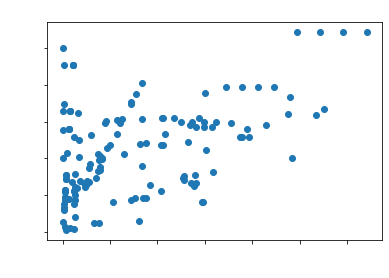

In [144]:
x = numpy.array(dataframe['Total Sugars (g)'])
y = numpy.array(dataframe['Per Serve Size'])
plt.scatter(x, y)
plt.title("Gimme some Sugar!", fontweight ="bold", color ="white")
plt.xlabel("Total Sugars in grams", fontweight ="bold", color ="white")
plt.ylabel("Serving Size in grams", fontweight ="bold", color ="white")
plt.xticks(fontsize= 10, color ="white")
plt.yticks(fontsize= 10, color ="white")
plt.show()


In [150]:
## print(dataframe.head(25))
dataframe['grams sugar/mL'] = round(dataframe['Total Sugars (g)'] / dataframe['Per Serve Size'] * 100, 2)
beverage_df = dataframe[['Menu Category','Menu Items','Total Sugars (g)', 'Per Serve Size', 'grams sugar/mL']]
desserts_df = dataframe[['Menu Category','Menu Items','Total Sugars (g)', 'Per Serve Size', 'grams sugar/mL']]
beverage_df = beverage_df.loc[beverage_df['Menu Category'] == ('Beverages Menu')]
desserts_df = desserts_df.loc[desserts_df['Menu Category'] == ('Desserts Menu')]
df_print = beverage_df[['Menu Items','Total Sugars (g)', 'Per Serve Size', 'grams sugar/mL']]
print(df_print.head(5))
print(desserts_df)

              Menu Items  Total Sugars (g)  Per Serve Size  grams sugar/mL
115      Small Coca-Cola             27.39           299.0            9.16
116     Medium Coca-Cola             37.84           394.0            9.60
117      Large Coca-Cola             54.34           544.0            9.99
118   Small Fanta Oragne             32.37           299.0           10.83
119  Medium Fanta Orange             44.72           394.0           11.35
     Menu Category               Menu Items  Total Sugars (g)  Per Serve Size  \
102  Desserts Menu    Small McFlurry - Oreo             14.49           86.79   
103  Desserts Menu  Regular McFlurry - Oreo             25.35          147.38   

     grams sugar/mL  
102            16.7  
103            17.2  


<a class="anchor" id="section5"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Question #2 Danger of Fat</span></h2>

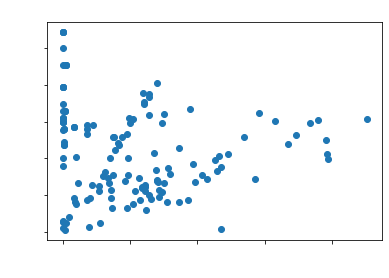

In [146]:
x = numpy.array(dataframe['Total fat (g)'])
y = numpy.array(dataframe['Per Serve Size'])
plt.scatter(x, y)
plt.title("Fat is Beautiful?", fontweight ="bold", color ="white")
plt.xlabel("Total Fat in grams", fontweight ="bold", color ="white")
plt.ylabel("Serving Size in grams", fontweight ="bold", color ="white")
plt.xticks(fontsize= 10, color ="white")
plt.yticks(fontsize= 10, color ="white")
plt.show()

In [147]:
dataframe['ratio_fat'] = round(dataframe['Total fat (g)'] / dataframe['Per Serve Size'] * 100, 2)
beverage_df = dataframe[['Menu Category','Menu Items','Total fat (g)', 'Per Serve Size', 'ratio_fat']]
beverage_df = beverage_df.loc[beverage_df['Menu Category'] == ('Beverages Menu')]
beverage_df.drop(['Menu Category'], axis = 1)
print(beverage_df.head(5))
print(desserts_df)

      Menu Category           Menu Items  Total fat (g)  Per Serve Size  \
115  Beverages Menu      Small Coca-Cola            0.0           299.0   
116  Beverages Menu     Medium Coca-Cola            0.0           394.0   
117  Beverages Menu      Large Coca-Cola            0.0           544.0   
118  Beverages Menu   Small Fanta Oragne            0.0           299.0   
119  Beverages Menu  Medium Fanta Orange            0.0           394.0   

     ratio_fat  
115        0.0  
116        0.0  
117        0.0  
118        0.0  
119        0.0  
     Menu Category               Menu Items  Total Sugars (g)  Per Serve Size  \
102  Desserts Menu    Small McFlurry - Oreo             14.49           86.79   
103  Desserts Menu  Regular McFlurry - Oreo             25.35          147.38   

     grams sugar/mL  
102            16.7  
103            17.2  


* [Return to Top: Table of Contents](#table_contents)

<a class="anchor" id="section6"></a>
<h2 style="color: #808080; background-color:#9aa9a9; text-align:center; border: 3px solid #000000"><span style="color:#670100; font-weight:800">Question #3 Danger of Sodium</span></h2>

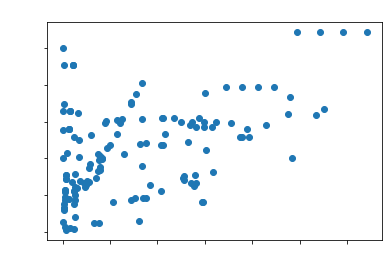

In [148]:
x = numpy.array(dataframe['Total Sugars (g)'])
y = numpy.array(dataframe['Per Serve Size'])
plt.scatter(x, y)
plt.title("Some fries with your salt?", fontweight ="bold", color ="white")
plt.xlabel("Total Sodium in mgs", fontweight ="bold", color ="white")
plt.ylabel("Serving Size in grams", fontweight ="bold", color ="white")
plt.xticks(fontsize= 10, color ="white")
plt.yticks(fontsize= 10, color ="white")
plt.show()

In [149]:
dataframe['ratio_sodium'] = round(dataframe['Sodium (mg)'] / dataframe['Per Serve Size'] * 100, 2)
salty_df = dataframe[['Menu Category','Menu Items','Sodium (mg)', 'Per Serve Size', 'ratio_sodium']]
salty_df = salty_df.loc[salty_df['Menu Category'] == ('Beverages Menu')]
salty_df = salty_df.loc[salty_df['Menu Category'] == ('Desserts Menu')]
salty_df.drop(['Menu Category'], axis = 1)
print(beverage_df.head(5))
print(desserts_df)

      Menu Category           Menu Items  Total fat (g)  Per Serve Size  \
115  Beverages Menu      Small Coca-Cola            0.0           299.0   
116  Beverages Menu     Medium Coca-Cola            0.0           394.0   
117  Beverages Menu      Large Coca-Cola            0.0           544.0   
118  Beverages Menu   Small Fanta Oragne            0.0           299.0   
119  Beverages Menu  Medium Fanta Orange            0.0           394.0   

     ratio_fat  
115        0.0  
116        0.0  
117        0.0  
118        0.0  
119        0.0  
     Menu Category               Menu Items  Total Sugars (g)  Per Serve Size  \
102  Desserts Menu    Small McFlurry - Oreo             14.49           86.79   
103  Desserts Menu  Regular McFlurry - Oreo             25.35          147.38   

     grams sugar/mL  
102            16.7  
103            17.2  
